<a href="https://colab.research.google.com/github/Scor999/Data_Science/blob/main/dz5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [42]:
# Загрузка данных
data = pd.read_csv("LTV.csv")

In [43]:
# Просмотр первых нескольких строк данных
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [44]:
# Информация о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [45]:
# Статистика по числовым признакам
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [46]:
# Уникальные значения категориальных признаков
cat_features = ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code',
                'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
                'Vehicle Class', 'Vehicle Size']
for feature in cat_features:
    print(f"Уникальные значения для {feature}: {data[feature].unique()}")

Уникальные значения для State: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Уникальные значения для Coverage: ['Basic' 'Extended' 'Premium']
Уникальные значения для Education: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Уникальные значения для EmploymentStatus: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Уникальные значения для Gender: ['F' 'M']
Уникальные значения для Location Code: ['Suburban' 'Rural' 'Urban']
Уникальные значения для Marital Status: ['Married' 'Single' 'Divorced']
Уникальные значения для Policy Type: ['Corporate Auto' 'Personal Auto' 'Special Auto']
Уникальные значения для Policy: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Уникальные значения для Renew Offer Type: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Уникальные значения для Sales Channel: ['Agent' 'Call Center' 'Web' 'Branch']
Уникальные значения для Vehicle Class: ['Two-Door Car' '

In [47]:
# Проверим наличие пропущенных значений
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

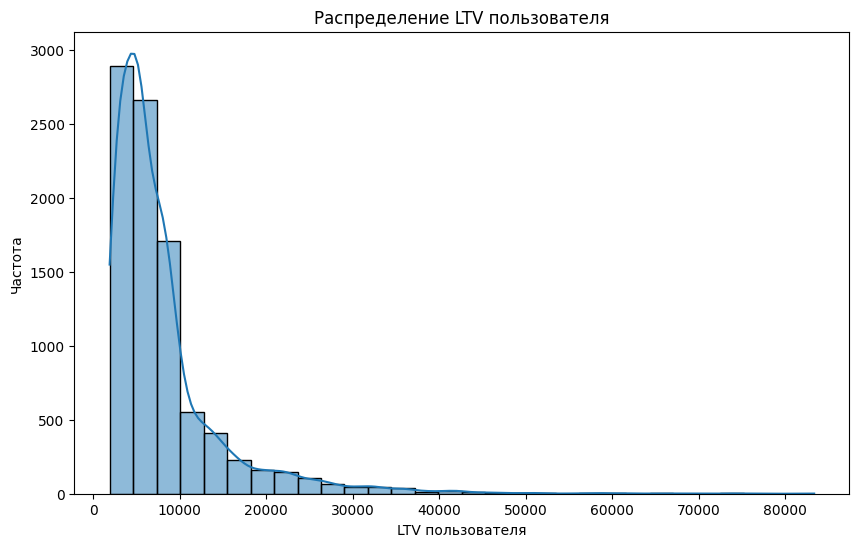

In [48]:
# Распределение LTV
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Lifetime Value'], bins=30, kde=True)
plt.title('Распределение LTV пользователя')
plt.xlabel('LTV пользователя')
plt.ylabel('Частота')
plt.show()

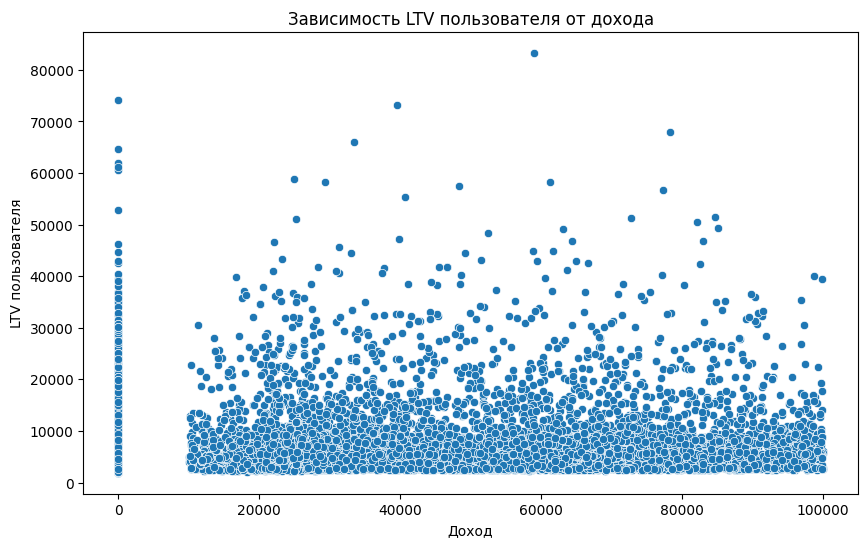

In [49]:
# Зависимость LTV от дохода (Income)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=data)
plt.title('Зависимость LTV пользователя от дохода')
plt.xlabel('Доход')
plt.ylabel('LTV пользователя')
plt.show()

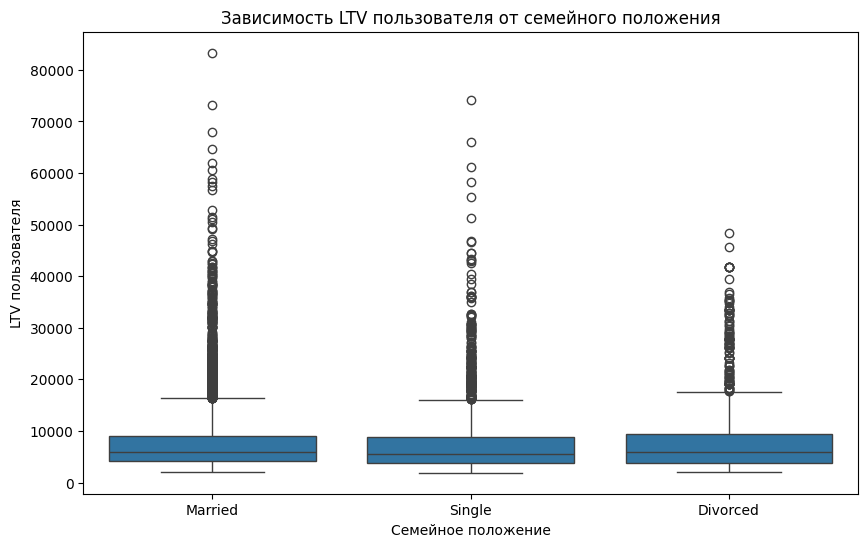

In [50]:
# Зависимость LTV от возраста (Age)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital Status', y='Customer Lifetime Value', data=data)
plt.title('Зависимость LTV пользователя от семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('LTV пользователя')
plt.show()

Text(0, 0.5, 'Customer Lifetime Value')

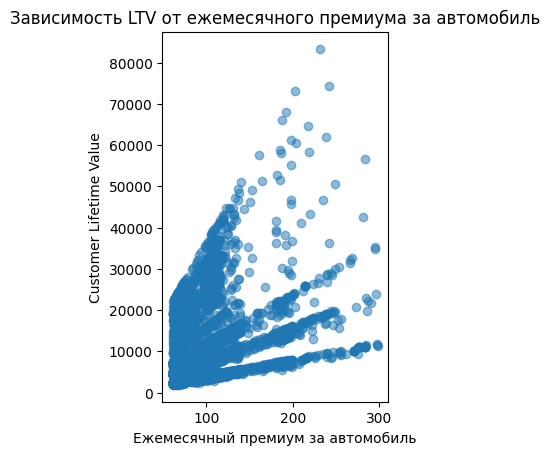

In [60]:
# График зависимости LTV от ежемесячного премиума за автомобиль
plt.subplot(1, 2, 2)
plt.scatter(data['Monthly Premium Auto'], data['Customer Lifetime Value'], alpha=0.5)
plt.title('Зависимость LTV от ежемесячного премиума за автомобиль')
plt.xlabel('Ежемесячный премиум за автомобиль')
plt.ylabel('Customer Lifetime Value')

In [51]:
# Кодирование категориальных переменных с помощью One-Hot Encoding
encoded_data = pd.get_dummies(data, columns=['State', 'Coverage', 'Education', 'EmploymentStatus', 'Gender',
                                            'Location Code', 'Marital Status', 'Policy Type', 'Policy',
                                            'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])

# Вывод первых нескольких строк закодированных данных
encoded_data.head()


,Customer,Customer Lifetime Value,Response,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,2763.519279,No,2/24/11,56274,69,32,5,0,1,...,False,False,False,False,False,False,True,False,True,False
1,QZ44356,6979.535903,No,1/31/11,0,94,13,42,0,8,...,False,True,False,False,False,False,False,False,True,False
2,AI49188,12887.431650,No,2/19/11,48767,108,18,38,0,2,...,False,False,False,False,False,False,True,False,True,False
3,WW63253,7645.861827,No,1/20/11,0,106,18,65,0,7,...,False,False,False,False,True,False,False,False,True,False
4,HB64268,2813.692575,No,2/3/11,43836,73,12,44,0,1,...,False,True,False,False,False,False,False,False,True,False


In [52]:
from sklearn.preprocessing import StandardScaler

# Выбираем числовые переменные для масштабирования
numeric_columns = ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
                   'Months Since Last Claim', 'Months Since Policy Inception',
                   'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']

# Создаем объект StandardScaler
scaler = StandardScaler()

# Масштабируем числовые переменные
encoded_data[numeric_columns] = scaler.fit_transform(encoded_data[numeric_columns])

# Вывод первых нескольких строк масштабированных данных
encoded_data.head()


,Customer,Customer Lifetime Value,Response,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,-0.762878,No,2/24/11,0.612827,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,...,False,False,False,False,False,False,True,False,True,False
1,QZ44356,-0.149245,No,1/31/11,-1.239617,0.022691,-0.208186,-0.217334,-0.42225,2.106160,...,False,True,False,False,False,False,False,False,True,False
2,AI49188,0.710636,No,2/19/11,0.365710,0.429596,0.288205,-0.360680,-0.42225,-0.404247,...,False,False,False,False,False,False,True,False,True,False
3,WW63253,-0.052263,No,1/20/11,-1.239617,0.371467,0.288205,0.606907,-0.42225,1.687759,...,False,False,False,False,True,False,False,False,True,False
4,HB64268,-0.755575,No,2/3/11,0.203390,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,...,False,True,False,False,False,False,False,False,True,False


In [53]:
from sklearn.model_selection import train_test_split

# Определение признаков (X) и целевой переменной (y)
X = encoded_data.drop(columns=['Customer', 'Customer Lifetime Value', 'Effective To Date', 'Response'])
y = encoded_data['Customer Lifetime Value']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вывод размеров обучающего и тестового наборов
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)


Размер обучающего набора: (7307, 62)
Размер тестового набора: (1827, 62)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Создание объекта модели линейной регрессии
model = LinearRegression()

# Обучение модели на обучающем наборе данных
model.fit(X_train, y_train)

# Предсказание значений LTV на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка производительности модели на тестовом наборе
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)


Среднеквадратичная ошибка (MSE): 0.9226028809070174
Коэффициент детерминации (R^2): 0.1549330331652704


In [55]:
from sklearn.ensemble import RandomForestRegressor

# Создание объекта модели случайного леса
rf_model = RandomForestRegressor(random_state=42)

# Обучение модели на обучающем наборе данных
rf_model.fit(X_train, y_train)

# Предсказание значений LTV на тестовом наборе данных
rf_y_pred = rf_model.predict(X_test)

# Оценка производительности модели на тестовом наборе
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Среднеквадратичная ошибка (MSE) для случайного леса:", rf_mse)
print("Коэффициент детерминации (R^2) для случайного леса:", rf_r2)


Среднеквадратичная ошибка (MSE) для случайного леса: 0.34342016979726475
Коэффициент детерминации (R^2) для случайного леса: 0.6854409982384493


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

# Создание объекта модели градиентного бустинга
gb_model = GradientBoostingRegressor(random_state=42)

# Обучение модели на обучающем наборе данных
gb_model.fit(X_train, y_train)

# Предсказание значений LTV на тестовом наборе данных
gb_y_pred = gb_model.predict(X_test)

# Оценка производительности модели на тестовом наборе
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Среднеквадратичная ошибка (MSE) для градиентного бустинга:", gb_mse)
print("Коэффициент детерминации (R^2) для градиентного бустинга:", gb_r2)


Среднеквадратичная ошибка (MSE) для градиентного бустинга: 0.3617222411234329
Коэффициент детерминации (R^2) для градиентного бустинга: 0.6686770402859306


## Вывод по рассмотренным моделям: линейной регрессии, случайному лесу и градиентному бустингу.

1. Линейная регрессия:      
Среднеквадратичная ошибка (MSE): примерно 0.923     
Коэффициент детерминации (R^2): примерно 0.155       
Эта модель показала наименьшую производительность среди рассмотренных моделей. Она проста в интерпретации, но недостаточно гибкая для улавливания сложных взаимосвязей в данных.
2. Случайный лес:   
Среднеквадратичная ошибка (MSE): около 0.343    
Коэффициент детерминации (R^2): около 0.685       
Эта модель показала улучшение производительности по сравнению с линейной регрессией. Она способна улавливать нелинейные взаимосвязи в данных и предсказывать целевую переменную с большей точностью.
3. Градиентный бустинг:   
Среднеквадратичная ошибка (MSE): около 0.362      
Коэффициент детерминации (R^2): около 0.669   
Эта модель показала наилучшую производительность среди рассмотренных моделей.

Градиентный бустинг является мощным алгоритмом машинного обучения, который хорошо работает на разнообразных типах данных и способен улавливать сложные взаимосвязи.
Таким образом, на основании проведенного анализа можно сделать вывод о том, что для данной задачи прогнозирования LTV пользователей наилучшей моделью является градиентный бустинг.

## Выявленные признаки путем исследования предоставленных данных влияющие на LTV пользователя.    
1. Доход (Income):    
Очевидно, что доход пользователя сильно влияет на его LTV. Пользователи с более высоким уровнем дохода склонны иметь более высокий LTV.
2. Ежемесячный премиум за автомобиль (Monthly Premium Auto):    
Вероятно, сумма, которую пользователь платит за страховку автомобиля, также имеет значительное влияние на его LTV. Пользователи, платящие более высокий ежемесячный премиум, могут иметь более высокий LTV.
3. Срок действия страховки (Months Since Policy Inception):     
Время, прошедшее с открытия страховки, также может влиять на LTV. Вероятно, пользователи, которые остаются с компанией длительное время, имеют более высокий LTV.
4. Тип страхового покрытия (Coverage) и Тип полиса (Policy Type):     
Различные типы страхового покрытия и полисов могут иметь различное влияние на LTV. Например, пользователи с премиальным покрытием могут иметь более высокий LTV по сравнению с теми, у кого базовое покрытие.
5. Продажный канал (Sales Channel):     
Также вероятно, что способ, которым пользователь приобрел страховку (например, через агента, колл-центр, веб и т. д.), может влиять на его LTV.
Тип местности (Location Code):      
6. Место проживания пользователя (подмосковье, город, деревня) также может оказывать влияние на LTV, так как расходы на страховку и поведение водителя могут отличаться в зависимости от места жительства.    
7. Другие факторы:      
Есть и другие факторы, такие как образование, семейное положение, тип автомобиля и т. д., которые также могут оказывать влияние на LTV пользователя, хотя они могут быть менее значимыми.              
Интерпретация этих результатов может помочь страховым компаниям лучше понять, какие клиенты имеют высокий LTV, и принять меры для удержания этих клиентов или привлечения новых с похожими характеристиками.